Import 버전들 확인

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as matplotlib
import sklearn as sklearn
import tensorflow as tensorflow
import matplotlib.pyplot as plt

print('Numpy Version', np.__version__)
print('Pandas Version', pd.__version__)
print('Matplotlib Version', matplotlib.__version__)
print('Scikit-Learn Version', sklearn.__version__)
print('Tensorflow Version', tensorflow.__version__)

Numpy Version 1.21.6
Pandas Version 1.3.5
Matplotlib Version 3.2.2
Scikit-Learn Version 1.0.2
Tensorflow Version 2.9.2


In [ ]:
%matplotlib inline

DATA 읽어오기

In [ ]:
raw_data = pd.read_excel('CERML_origin_rvs.xlsx')
print(raw_data)
feature_names = np.array(['Nnum', 'ed', 'rcov', 'rZ', 'Ne'])
print(feature_names)

     M      G_Cl  Nnum    ed  rcov    rZ  Ne
0   Mn  0.795966     4 -0.83  1.39  0.23   5
1   Fe  0.858026     4 -0.62  1.32  0.22   6
2   Co  1.150586     4 -1.01  1.26  0.21   7
3   Ni  1.829476     4 -1.17  1.24  0.20   8
4   Cu  1.902396     4 -1.50  1.32  0.19  10
..  ..       ...   ...   ...   ...   ...  ..
70   W -2.478654     0 -0.90  1.62  0.59   4
71  Os -1.067414     0 -1.17  1.44  0.54   6
72  Ir -0.004404     0 -0.94  1.41  0.53   7
73  Pt  1.471646     0 -1.52  1.36  0.51   9
74  Au  1.570000     0 -3.33  1.36  0.49  10

[75 rows x 7 columns]
['Nnum' 'ed' 'rcov' 'rZ' 'Ne']


Data preprocessing

In [ ]:
print(raw_data)
data_cleaned = raw_data.iloc[:,2:] # input data들만 모은 array
print(data_cleaned)

     M      G_Cl  Nnum    ed  rcov    rZ  Ne
0   Mn  0.795966     4 -0.83  1.39  0.23   5
1   Fe  0.858026     4 -0.62  1.32  0.22   6
2   Co  1.150586     4 -1.01  1.26  0.21   7
3   Ni  1.829476     4 -1.17  1.24  0.20   8
4   Cu  1.902396     4 -1.50  1.32  0.19  10
..  ..       ...   ...   ...   ...   ...  ..
70   W -2.478654     0 -0.90  1.62  0.59   4
71  Os -1.067414     0 -1.17  1.44  0.54   6
72  Ir -0.004404     0 -0.94  1.41  0.53   7
73  Pt  1.471646     0 -1.52  1.36  0.51   9
74  Au  1.570000     0 -3.33  1.36  0.49  10

[75 rows x 7 columns]
    Nnum    ed  rcov    rZ  Ne
0      4 -0.83  1.39  0.23   5
1      4 -0.62  1.32  0.22   6
2      4 -1.01  1.26  0.21   7
3      4 -1.17  1.24  0.20   8
4      4 -1.50  1.32  0.19  10
..   ...   ...   ...   ...  ..
70     0 -0.90  1.62  0.59   4
71     0 -1.17  1.44  0.54   6
72     0 -0.94  1.41  0.53   7
73     0 -1.52  1.36  0.51   9
74     0 -3.33  1.36  0.49  10

[75 rows x 5 columns]


여기서부터 Supervised Learning Part (SVM, Randomforest, NN)

Training set 나누기!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = data_cleaned.astype(np.float)
y = raw_data.iloc[:,1].astype(np.float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)  # 적당한 비율로 training과 test set을 나누는 부분

<ipython-input-6-c951e57a26ad>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = data_cleaned.astype(np.float)
<ipython-input-6-c951e57a26ad>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = raw_data.iloc[:,1].astype(np.float)


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
hyper_params_rdf = {'n_estimators':np.arange(1, 25, 1)} # 아마 paramter의 개수가 tree의 개수인가...?

rdf_tune = RandomForestRegressor()
g_search_rdf = RandomizedSearchCV(rdf_tune, hyper_params_rdf, cv=5, n_jobs=-1, random_state=42)
g_search_rdf.fit(x_train, y_train) # 최고의 hyperparamter를 찾기 위한 학습!

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
                   random_state=42)

In [ ]:
print('Best Estimator ', g_search_rdf.best_estimator_) # 최고의 hyperparameter 찾음!

Best Estimator  RandomForestRegressor(n_estimators=17)


In [ ]:
estimators = g_search_rdf.best_estimator_.n_estimators # 그 숫자를 estimators라는 변수에 대입!

In [ ]:
regressor = RandomForestRegressor(n_estimators=estimators, random_state=42) # 최고의 개수로 다시 설정
regressor.fit(x_train, y_train); # 최고의 개수로 학습!

In [ ]:
y_pred_train = regressor.predict(x_train) # 최고의 개수로 학습한 거에 x_train을 넣은 결과
y_pred = regressor.predict(x_test) # 최고의 개수로 학습한 거에 x_test를 넣은 결과

print('Score on training set:', regressor.score(x_train, y_train))
print('Score on test set:', regressor.score(x_test, y_test))

Score on training set: 0.9884903572333602
Score on test set: 0.9417345234778043


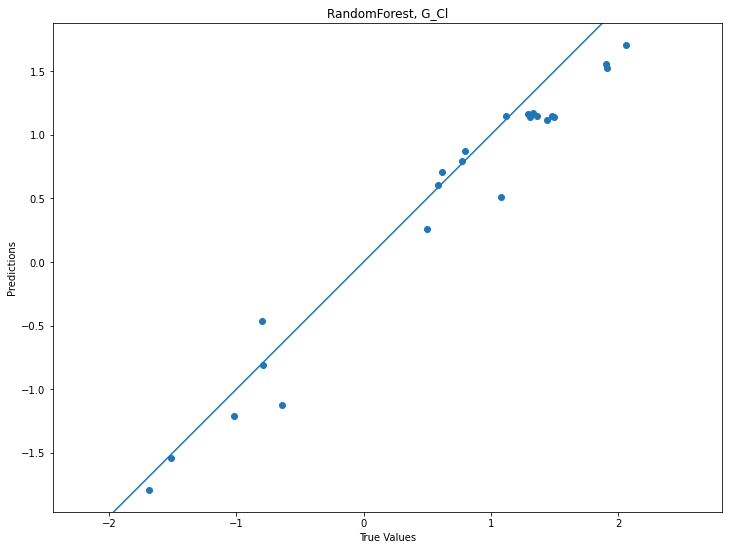

In [ ]:
plt.figure(figsize=(12,9))

plt.scatter(y_test, y_pred) # pairity plot 그리기!!
plt.title('RandomForest, G_Cl')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-1000, 1000], [-1000, 1000]);

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse_rdf_train = mean_squared_error(y_train, y_pred_train) # rdf에서 train set 에러
mse_rdf_test = mean_squared_error(y_test, y_pred) # rdf에서 test set 에러

print(mse_rdf_train)
print(mse_rdf_test)

r2_rdf_train = r2_score(y_train, y_pred_train) # rdf에서 train set r2 점수
r2_rdf_test = r2_score(y_test, y_pred) # rdf에서 test set r2 점수

print(r2_rdf_train)
print(r2_rdf_test)

0.014412153897379706
0.07158835486929294
0.9884903572333602
0.9417345234778043


Prediction

In [ ]:
data_1 = pd.read_excel('CERML_add.xlsx')
print(data_1)
feature_names = np.array(['Nnum', 'ed','Qe', 'rcov', 'rZ', 'Ne'])
print(feature_names)

FileNotFoundError: ignored

In [ ]:
data_cleaned = data_1.iloc[:,1:] # input data들만 모은 array
print(data_cleaned)

In [ ]:
y_pred_new = regressor.predict(data_cleaned) # 최고의 개수로 학습한 거에 x_test를 넣은 결과
print(y_pred_new)

#f = open(r'dd.txt','w')
#f.write(str(y_pred_new))
#f.close()